In [163]:



import pandas as pd
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




In [164]:
data = pd.read_csv('E-salaries .csv')

### 1. Display Top 5 Rows of The Dataset

In [165]:
data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


### 2. Check Last 5 Rows of The Dataset

In [166]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16533,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [167]:
data.shape

(16534, 11)

### 4. Get Overall Statistics About The Dataset

In [168]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


### 5. Data Preprocessing

In [169]:
data.head(6)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M


In [170]:
current_year = datetime.datetime.now().year


In [171]:
data['duty'] = current_year - data['work_year']


In [172]:
print(data)


       work_year experience_level employment_type                  job_title  \
0           2024               SE              FT                AI Engineer   
1           2024               SE              FT                AI Engineer   
2           2024               SE              FT              Data Engineer   
3           2024               SE              FT              Data Engineer   
4           2024               SE              FT  Machine Learning Engineer   
...          ...              ...             ...                        ...   
16529       2020               SE              FT             Data Scientist   
16530       2021               MI              FT   Principal Data Scientist   
16531       2020               EN              FT             Data Scientist   
16532       2020               EN              CT      Business Data Analyst   
16533       2021               SE              FT       Data Science Manager   

        salary salary_currency  salary_

In [173]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,duty
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M,0
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M,0
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M,0
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M,0
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M,0


In [174]:
data.drop('duty',axis=1,inplace=True)

In [175]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


### 6. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [176]:
data.shape

(16534, 11)

### 7. Get INFO About  Dataset

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


### 8. Check Null Values 

In [178]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

####  9.Outlier Removal

<Axes: ylabel='salary'>

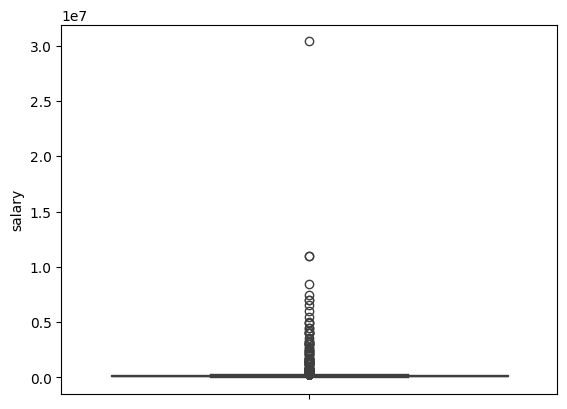

In [179]:
sns.boxplot(data['salary'])


In [180]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [181]:

sorted(data['salary'],reverse=True)

[30400000,
 11000000,
 11000000,
 8500000,
 7500000,
 7000000,
 7000000,
 6600000,
 6000000,
 5500000,
 5000000,
 4950806,
 4900000,
 4460000,
 4450000,
 4200000,
 4000000,
 4000000,
 4000000,
 4000000,
 3600000,
 3300000,
 3200000,
 3200000,
 3000000,
 3000000,
 3000000,
 3000000,
 3000000,
 2800000,
 2700000,
 2500000,
 2500000,
 2400000,
 2400000,
 2300000,
 2250000,
 2200000,
 2100000,
 2000000,
 2000000,
 1800000,
 1799997,
 1700000,
 1700000,
 1672000,
 1650000,
 1600000,
 1500000,
 1500000,
 1450000,
 1440000,
 1440000,
 1400000,
 1400000,
 1400000,
 1400000,
 1350000,
 1335000,
 1300000,
 1250000,
 1250000,
 1250000,
 1200000,
 1050000,
 1000000,
 866000,
 840000,
 800000,
 800000,
 800000,
 774000,
 750000,
 750000,
 750000,
 750000,
 750000,
 750000,
 750000,
 750000,
 720000,
 720000,
 720000,
 720000,
 720000,
 720000,
 720000,
 720000,
 720000,
 720000,
 700000,
 700000,
 627000,
 600000,
 600000,
 600000,
 550000,
 550000,
 530000,
 510000,
 500000,
 500000,
 500000,
 485

In [182]:
Q1 = data[(data['salary']>=33.0) & (data['salary']<=35.0)]

In [183]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [184]:
print(data)

       work_year experience_level employment_type                  job_title  \
0           2024               SE              FT                AI Engineer   
1           2024               SE              FT                AI Engineer   
2           2024               SE              FT              Data Engineer   
3           2024               SE              FT              Data Engineer   
4           2024               SE              FT  Machine Learning Engineer   
...          ...              ...             ...                        ...   
16529       2020               SE              FT             Data Scientist   
16530       2021               MI              FT   Principal Data Scientist   
16531       2020               EN              FT             Data Scientist   
16532       2020               EN              CT      Business Data Analyst   
16533       2021               SE              FT       Data Science Manager   

        salary salary_currency  salary_

In [185]:
data.shape

(16534, 11)

#### 10.Encoding the Categorical Columns

In [186]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,45864,US,0,US,M


In [187]:
data['salary'].unique()

array([202730,  92118, 130500, ..., 138350, 423000, 412000], dtype=int64)

In [188]:
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


### 11. Store Feature Matrix In X and Response(Target) In Vector y

In [207]:
X = data.drop(['salary', 'work_year'], axis=1)  
y = data[['salary']]


In [208]:
X

,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,SE,FT,AI Engineer,USD,202730,US,0,US,M
1,SE,FT,AI Engineer,USD,92118,US,0,US,M
2,SE,FT,Data Engineer,USD,130500,US,0,US,M
3,SE,FT,Data Engineer,USD,96000,US,0,US,M
4,SE,FT,Machine Learning Engineer,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
16529,SE,FT,Data Scientist,USD,412000,US,100,US,L
16530,MI,FT,Principal Data Scientist,USD,151000,US,100,US,L
16531,EN,FT,Data Scientist,USD,105000,US,100,US,S
16532,EN,CT,Business Data Analyst,USD,100000,US,100,US,L


In [209]:
y

,salary
0,202730
1,92118
2,130500
3,96000
4,190000
...,...
16529,412000
16530,151000
16531,105000
16532,100000


### 12. Splitting The Dataset Into The Training Set And Test Set

In [210]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
categoral=X_train.select_dtypes('object').columns

In [212]:
import category_encoders

In [213]:
encoder=category_encoders.OneHotEncoder(cols=categoral)
X_train=encoder.fit_transform(X_train)

In [214]:
X_test=encoder.transform(X_test)

### 13. Model Training

In [215]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

c:\Users\ThrOw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ThrOw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 14. Prediction on Test Data

In [216]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

### 15. Evaluating the Algorithm

In [217]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [218]:
error1 = metrics.mean_absolute_error(y_test,y_pred1)
error2 = metrics.mean_absolute_error(y_test,y_pred2)
error3 = metrics.mean_absolute_error(y_test,y_pred3)
error4 = metrics.mean_absolute_error(y_test,y_pred4)

In [219]:
print(error1,error2,error3,error4)

11901.319863853767 2206.0808769277287 6365.961404338039 4858.811995034208


In [220]:
print(score1,score2,score3,score4)

0.8321885135159037 0.9461701393424266 0.9007613615396146 0.8862661430598398


In [221]:
y_train

,salary
2109,85000
15829,141300
4125,139000
8822,136000
7517,190000
...,...
11284,119250
11964,161000
5390,179000
860,144000


In [222]:
y_test

,salary
13835,152380
8544,150000
327,41418
10868,138900
5157,237600
...,...
14391,250000
5239,83576
6210,82673
6507,109000


In [204]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [205]:
final_data

,Models,R2_SCORE
0,LR,0.127619
1,RF,0.238244
2,GBR,0.203357
3,XG,0.242059


<Axes: xlabel='Models', ylabel='R2_SCORE'>

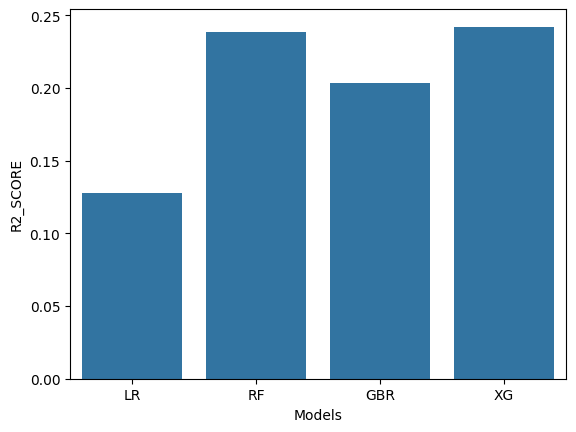

In [206]:
sns.barplot(data=final_data, x='Models', y='R2_SCORE')
